In [2]:
#Installing packages and libraries
install.packages("tidyverse")
library(tidyverse)

also installing the dependencies 'processx', 'xfun', 'lifecycle', 'glue', 'tidyselect', 'vctrs', 'scales', 'gargle', 'timechange', 'systemfonts', 'vroom', 'progress', 'callr', 'knitr', 'broom', 'conflicted', 'cli', 'dbplyr', 'dplyr', 'dtplyr', 'forcats', 'ggplot2', 'googledrive', 'googlesheets4', 'haven', 'hms', 'jsonlite', 'lubridate', 'magrittr', 'modelr', 'pillar', 'purrr', 'ragg', 'readr', 'readxl', 'reprex', 'rlang', 'rvest', 'stringr', 'tibble', 'tidyr', 'xml2'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'processx' 'xfun' 'glue' 'tidyselect'
  'vctrs' 'scales' 'timechange' 'systemfonts' 'vroom' 'cli' 'dplyr'
  'haven' 'jsonlite' 'lubridate' 'magrittr' 'purrr' 'ragg' 'readr'
  'readxl' 'rlang' 'tibble' 'tidyr' 'xml2'


  These will not be installed


installing the source packages 'lifecycle', 'gargle', 'progress', 'callr', 'knitr', 'broom', 'conflicted', 'dbplyr', 'dtplyr', 'forcats', 'ggplot2', 'googledrive', 'googlesheets4', 'hms', 'modelr', 'pillar', 'reprex', 'rvest', 'stringr', 'tidyverse'

Warning message in install.packages("tidyverse"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'callr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'knitr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'conflicted' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'gargle' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'dtplyr' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'forcats' had n

ERROR: Error in library(tidyverse): there is no package called 'tidyverse'


In [3]:
#Extracting the relevant data
relevant_data <- read.csv("MECOXCEL.csv")[, c(6,8,9,10,11)]

In [4]:
#Making the necessary calculations
relevant_data$freqfix <- relevant_data$nfix/relevant_data$trial.nwords
relevant_data$freqnrun <- relevant_data$nrun/relevant_data$trial.nwords
relevant_data$freqsac <- relevant_data$sac/relevant_data$trial.nwords
relevant_data$freqskip <- relevant_data$skip/relevant_data$trial.nwords



In [5]:

new_data <- relevant_data[, c(6,7,8,9)]

In [6]:
#Installing libraries and clusters
install.packages("cluster")
library(cluster)

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Package which is only available in source form, and may need
  compilation of C/C++/Fortran: 'cluster'


  These will not be installed


Warning message:
"package 'cluster' was built under R version 3.6.3"

In [8]:
#Categorizing the data
hierarchy <- diana(new_data)

NULL

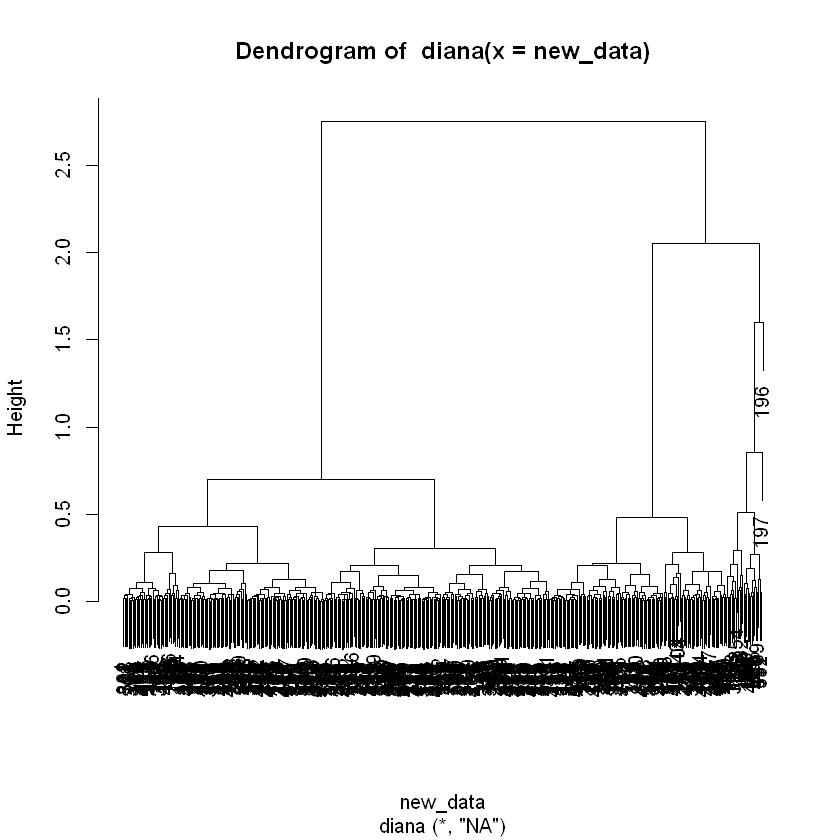

In [9]:
#Visualizing the resulting categorizations
shown_tree <- pltree(hierarchy)
shown_tree

In [11]:
#Extracting information about the categories' relations to each other
converted_hierarchy <- as.hclust(hierarchy)
cluster_assignment <- cutree(converted_hierarchy, k=ceiling(nrow(new_data)*0.9))

# Initializing a list to hold the data for each cluster
cluster_data <- list()

# Looping through the number of clusters and extracting data
for (k in unique(cluster_assignment)) {
  cluster_data[[k]] <- new_data[cluster_assignment == k, ]
}


In [15]:
# Looping through each cluster to calculate the mean of each feature
cluster_means <- lapply(unique(cluster_assignment), function(cluster_id) {
  cluster_data <- new_data[cluster_assignment == cluster_id, ]
  colMeans(cluster_data, na.rm = TRUE) # na.rm = TRUE to remove NA values in the calculation
})
names(cluster_means) <- paste("Cluster", unique(cluster_assignment))


In [17]:
length(unique(cluster_assignment))

[1] 434

In [18]:
#Comparing the data for each cluster to the data for dyslexic from the previous dataset, using Euclidean distance

#Last Cluster
freqfix7 <- cluster_means[["Cluster 434"]]["freqfix"] - 0.9986012304411283
freqnrun7 <- cluster_means[["Cluster 434"]]["freqnrun"] - 0.9991105514353424
freqsac7 <- cluster_means[["Cluster 434"]]["freqsac"] - 0.999131994453176
freqskip7 <- cluster_means[["Cluster 434"]]["freqskip"] - 0.9993646786746376
print("Last Cluster:")
print(sqrt(un7*un7 + deux7*deux7 + trois7*trois7 + quatre7*quatre7))

[1] "Last Cluster:"
 freqfix 
1.648966 
